<a href="https://colab.research.google.com/github/nataliawcislo/jobposting_dataset_analysis/blob/main/prediction_price_posting_job.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries for analysis in alphabetical order
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# show matplotlib charts in cells
%matplotlib inline


# Set display options to not include scientific notation 
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  print(len(fn))

Saving cat (1).csv to cat (1).csv
User uploaded file "cat (1).csv" with length 27744 bytes
11


In [ ]:
data_f = pd.read_csv(fn)
data_s = pd.read_csv(fn)
data_s.head()

,Job Title,Founded,Size,Max,Min,Level of expireince,experience,cat
0,Senior Data Scientist,15,1,181000,111000,1,1,3
1,"Data Scientist, Product Analytics",14,3,181000,111000,1,4,2
2,Data Analyst,3,1,181000,111000,1,5,2
3,"Director, Data Science",15,1,181000,111000,1,2,2
4,Data Scientist,37,1,181000,111000,1,3,2


In [ ]:
data_f.drop(['Job Title', 'Founded', 'Min'], axis=1, inplace=True)
data_f.head()

,Size,Max,Level of expireince,experience,cat
0,1,181000,1,1,3
1,3,181000,1,4,2
2,1,181000,1,5,2
3,1,181000,1,2,2
4,1,181000,1,3,2


In [ ]:
import pandas as pd

data_f['Max'] = round(data_f['Max']/12)
# data_f['Min'] = round(data_f['Min']/12)
# print(data_f['Min'])
# check format
print(data_f.dtypes)
# Change formay
data_f["Size"] = data_f["Size"].replace("Unknown", '2')
data_f["cat"] = data_f["cat"].replace("Unknown", '2')
# data_f['Founded'] = data_f['Founded'].astype('int64')
data_f['Size'] = data_f['Size'].astype('int64')
data_f['Max'] = data_f['Max'].astype('int64')
# data_f['Min'] = data_f['Min'].astype('int64')
data_f['Level of expireince'] = data_f['Level of expireince'].astype('int64')
data_f['experience'] = data_f['experience'].astype('int64')
# check format
print(data_f.dtypes)
# sort old -> young
# dataset.sort_values(by='Date', inplace=True)
# Double check the result
data_f.head()


Size                    object
Max                    float64
Level of expireince      int64
experience               int64
cat                      int64
dtype: object
Size                   int64
Max                    int64
Level of expireince    int64
experience             int64
cat                    int64
dtype: object


,Size,Max,Level of expireince,experience,cat
0,1,15083,1,1,3
1,3,15083,1,4,2
2,1,15083,1,5,2
3,1,15083,1,2,2
4,1,15083,1,3,2


In [ ]:
print(len(data_f["Max"]))
print(len(data_f["cat"]))
print(len(data_f['experience'])) 

514
514
514


In [ ]:
from sklearn.model_selection import train_test_split

train_dataset = data_f

# Split train data to X and y
X = train_dataset.drop(['Max'], axis = 1)
y = train_dataset.loc[:,['Max']]
X = X.to_numpy()
y = y.to_numpy()
print(X.shape)
print(y.shape)

(514, 4)
(514, 1)


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# # Different scaler for input and output
# scaler_x = MinMaxScaler(feature_range = (0,1))
# scaler_y = MinMaxScaler(feature_range = (0,1))

# # Fit the scaler using available training data
# input_scaler = scaler_x.fit(X_train)
# output_scaler = scaler_y.fit(y_train)

# # Apply the scaler to training data
# train_y_norm = output_scaler.transform(y_train)
# train_x_norm = input_scaler.transform(X_train)

# # Apply the scaler to test data
# test_y_norm = output_scaler.transform(y_test)
# test_x_norm = input_scaler.transform(X_test)


# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X)
# y = sc_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2) #random_state=42, shuffle=True

print(X_train)

[[3 2 2 2]
 [1 1 5 2]
 [1 1 2 2]
 ...
 [3 2 2 3]
 [3 2 3 2]
 [1 2 5 2]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Dane Testowe')]

<Figure size 432x288 with 0 Axes>

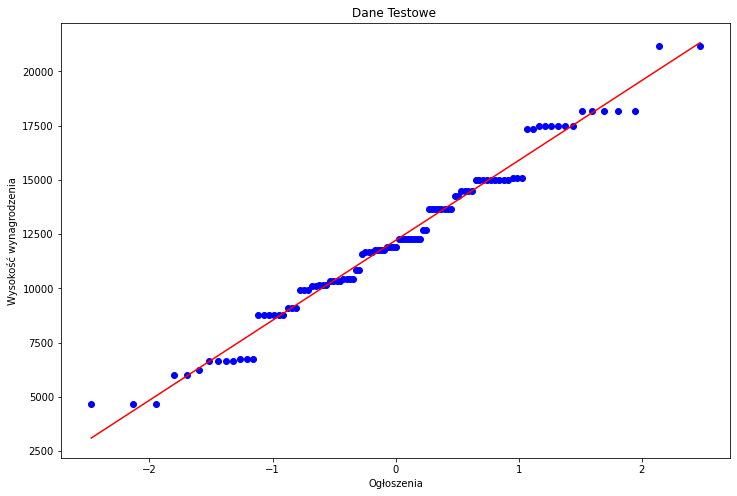

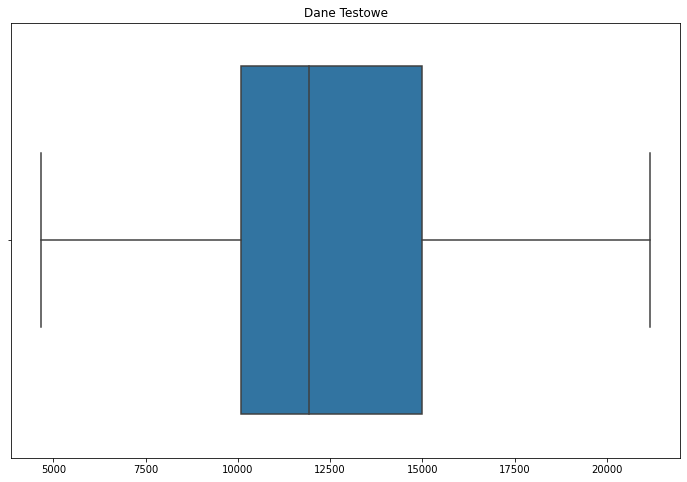

In [ ]:
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest
from scipy.stats import norm
from scipy import stats
import seaborn as sns

fig = plt.figure()
plt.subplots(figsize = (12, 8))
res = stats.probplot(y_test.ravel(), plot=plt)
plt.xlabel("Ogłoszenia")
plt.ylabel("Wysokość wynagrodzenia")
plt.title("Dane Testowe ")

plt.subplots(figsize = (12, 8))
sns.boxplot(y_test).set(title='Dane Testowe')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Zakres wynagrodzeń dla danych prognozowanych - Regresja Liniowa')]

<Figure size 432x288 with 0 Axes>

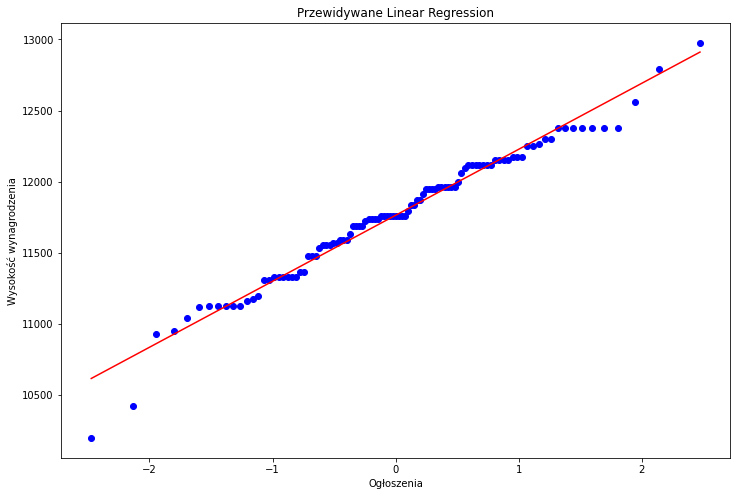

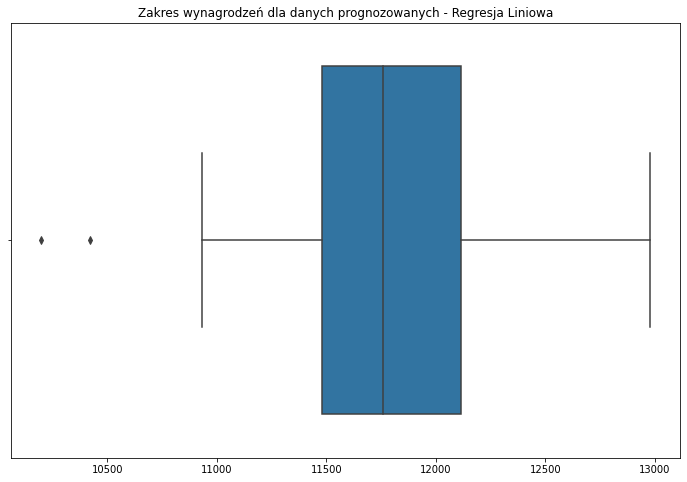

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

sum = y_pred - y_test
y_pred

from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest
from scipy.stats import norm
from scipy import stats
import seaborn as sns

fig = plt.figure()
plt.subplots(figsize = (12, 8))
res = stats.probplot(y_pred.ravel(), plot=plt)
plt.xlabel("Ogłoszenia")
plt.ylabel("Wysokość wynagrodzenia")
plt.title("Przewidywane Linear Regression")

# sns.boxplot(y_pred)
plt.subplots(figsize = (12, 8))
sns.boxplot(y_pred).set(title='Zakres wynagrodzeń dla danych prognozowanych - Regresja Liniowa')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing 

[Text(0.5, 1.0, 'Zakres wynagrodzeń dla danych prognozowanych - Logistic Regression')]

<Figure size 432x288 with 0 Axes>

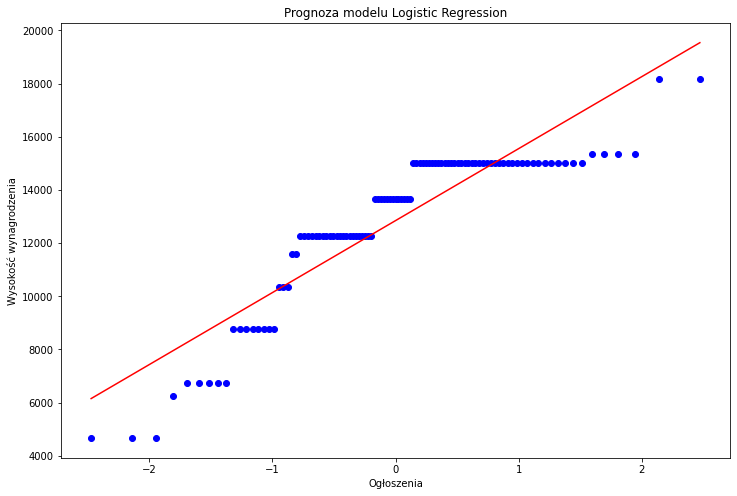

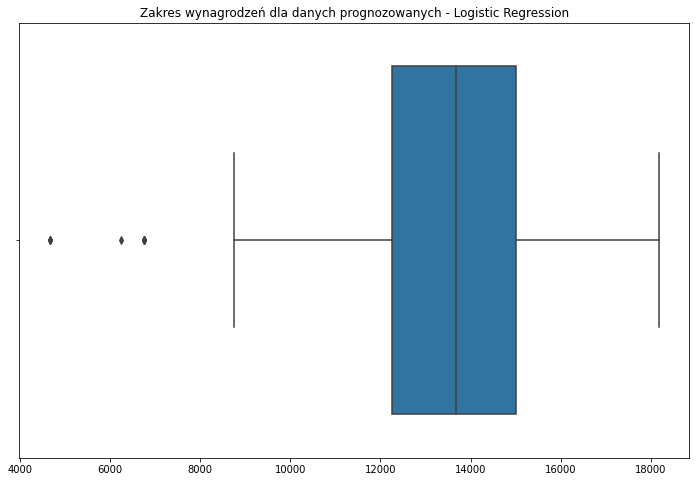

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

regressor=LogisticRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

sum = y_pred - y_test
y_pred

from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest
from scipy.stats import norm
from scipy import stats
import seaborn as sns

fig = plt.figure()
plt.subplots(figsize = (12, 8))
res = stats.probplot(y_pred.ravel(), plot=plt)
plt.xlabel("Ogłoszenia")
plt.ylabel("Wysokość wynagrodzenia")
plt.title("Prognoza wynagrodzeń - Logistic Regression")

# sns.boxplot(y_pred)
plt.subplots(figsize = (12, 8))
sns.boxplot(y_pred).set(title='Zakres wynagrodzeń dla danych prognozowanych - Logistic Regression')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Zakres wynagrodzeń dla danych testowych - SVR')]

<Figure size 432x288 with 0 Axes>

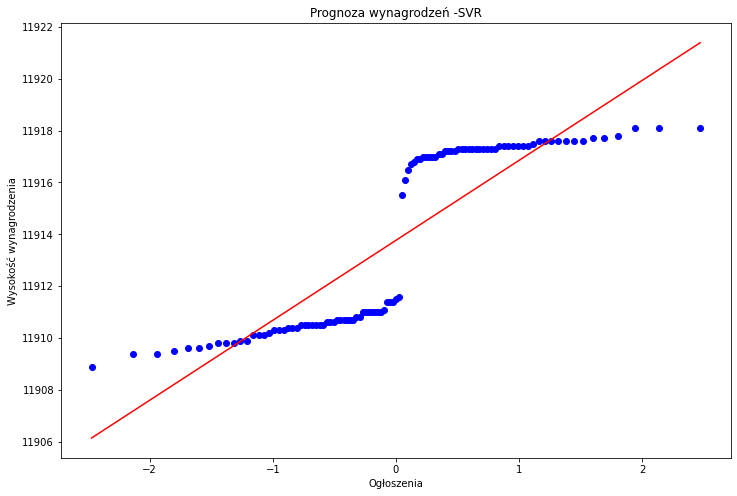

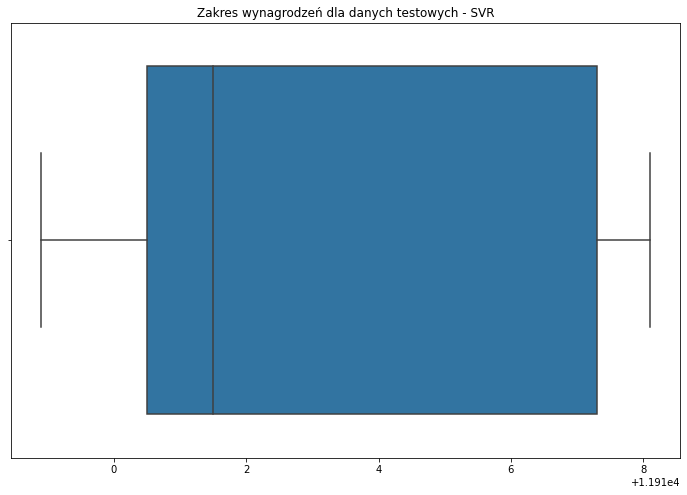

In [ ]:
from sklearn.svm import SVR

svclassifier = SVR(kernel = 'linear', C = 0.1,)
svclassifier.fit(X_train, y_train.ravel())
y_pred = svclassifier.predict(X_test)
sum = y_pred - y_test
sum
# num_zeros = np.count_nonzero(sum==0)
# print(num_zeros)

from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest
from scipy.stats import norm
from scipy import stats
import seaborn as sns

fig = plt.figure()
plt.subplots(figsize = (12, 8))
res = stats.probplot(y_pred, plot=plt)
plt.xlabel("Ogłoszenia")
plt.ylabel("Wysokość wynagrodzenia")
plt.title("Prognoza wynagrodzeń -SVR")


plt.subplots(figsize = (12, 8))
sns.boxplot(y_pred).set(title='Zakres wynagrodzeń dla danych testowych - SVR')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Zakres wynagrodzeń dla danych prognozowanych - SVR(kernel = poly, C = 0.1')]

<Figure size 432x288 with 0 Axes>

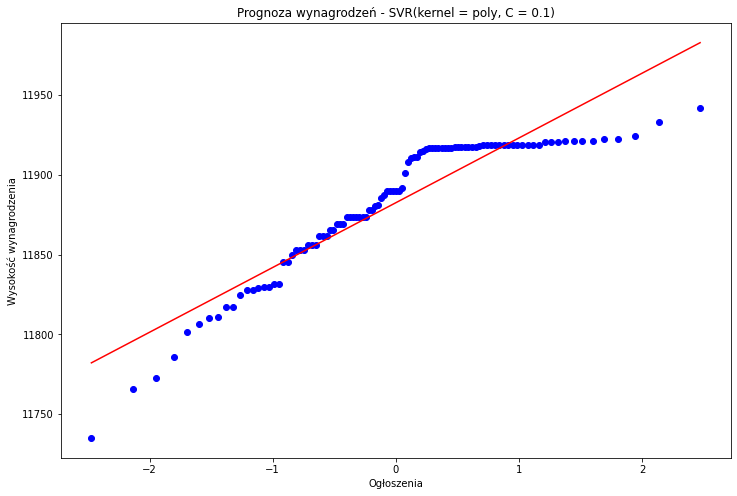

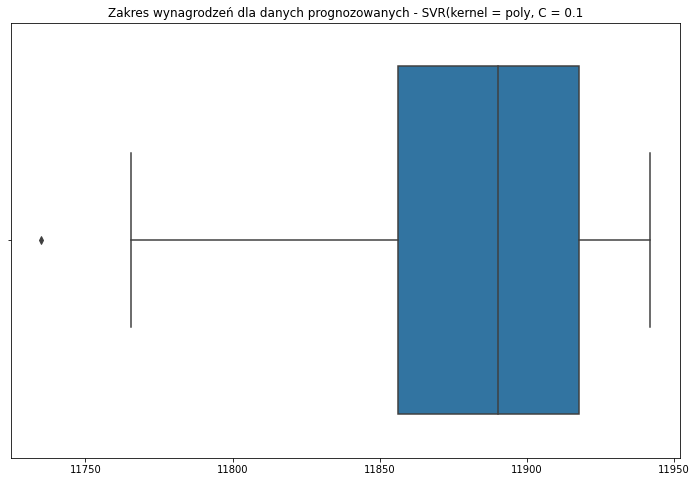

In [ ]:
from sklearn.svm import SVR

svclassifier = SVR(kernel = 'poly', C = 0.1)
svclassifier.fit(X_train, y_train.ravel())
y_pred = svclassifier.predict(X_test)

fig = plt.figure()
plt.subplots(figsize = (12, 8))
res = stats.probplot(y_pred, plot=plt)
plt.xlabel("Ogłoszenia")
plt.ylabel("Wysokość wynagrodzenia")
plt.title("Prognoza wynagrodzeń - SVR(kernel = poly, C = 0.1)")

plt.subplots(figsize = (12, 8))
sns.boxplot(y_pred).set(title='Zakres wynagrodzeń dla danych prognozowanych - SVR(kernel = poly, C = 0.1')

Model Accuracy: -0.000
The mean squared error (MSE) on test set: 15429432.1433


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

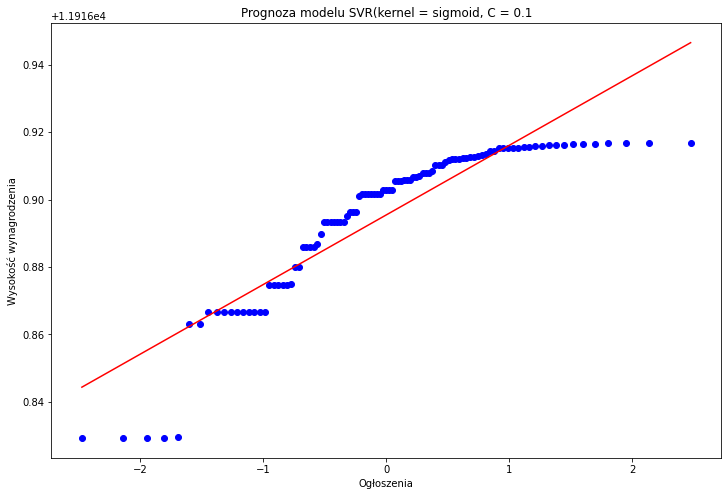

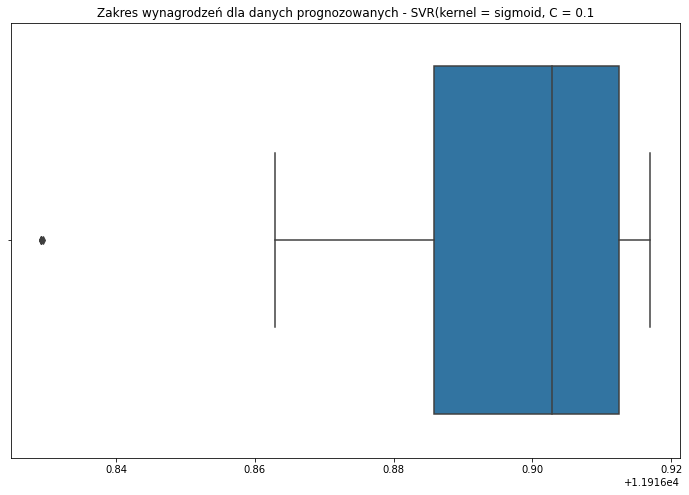

In [ ]:
from sklearn.svm import SVR

svclassifier = SVR(kernel = 'sigmoid', C = 0.1)
svclassifier.fit(X_train, y_train.ravel())
y_pred = svclassifier.predict(X_test)

fig = plt.figure()
plt.subplots(figsize = (12, 8))
res = stats.probplot(y_pred, plot=plt)
plt.xlabel("Ogłoszenia")
plt.ylabel("Wysokość wynagrodzenia")
plt.title("Prognoza modelu SVR(kernel = sigmoid, C = 0.1")

plt.subplots(figsize = (12, 8))
sns.boxplot(y_pred).set(title='Zakres wynagrodzeń dla danych prognozowanych - SVR(kernel = sigmoid, C = 0.1')

#
print("Model Accuracy: %.3f" % svclassifier.score(X_test_std, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, svclassifier.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Zakres wynagrodzeń dla danych prognozowanych - SVR(kernel = sigmoid, C = 0.3')]

<Figure size 432x288 with 0 Axes>

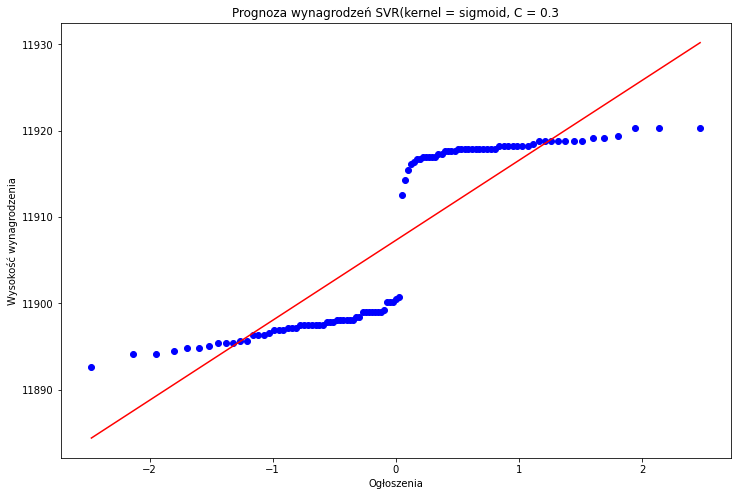

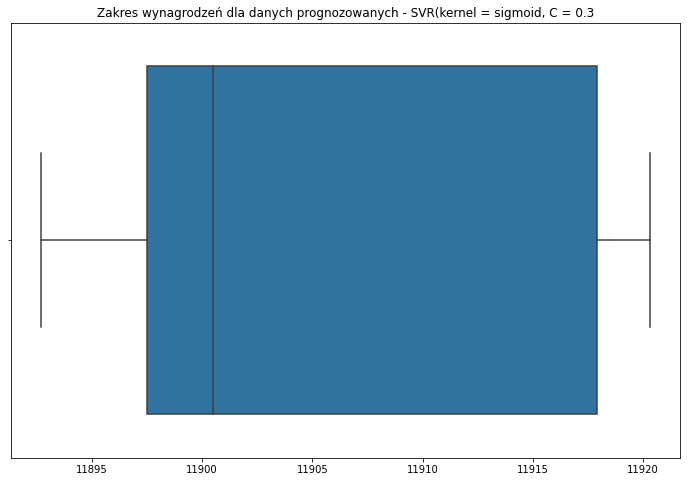

In [ ]:
from sklearn.svm import SVR

svclassifier = SVR(kernel = 'linear', C = 0.3, gamma = 'auto')
svclassifier.fit(X_train, y_train.ravel())
y_pred = svclassifier.predict(X_test)
sum = y_pred - y_test

fig = plt.figure()
plt.subplots(figsize = (12, 8))
res = stats.probplot(y_pred, plot=plt)
plt.xlabel("Ogłoszenia")
plt.ylabel("Wysokość wynagrodzenia")
plt.title("Prognoza wynagrodzeń SVR(kernel = sigmoid, C = 0.3")

plt.subplots(figsize = (12, 8))
sns.boxplot(y_pred).set(title='Zakres wynagrodzeń dla danych prognozowanych - SVR(kernel = sigmoid, C = 0.3')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Zakres wynagrodzeń dla danych prognozowanych - RandomForestRegressor(n_estimators = 1000, random_state = 42')]

<Figure size 432x288 with 0 Axes>

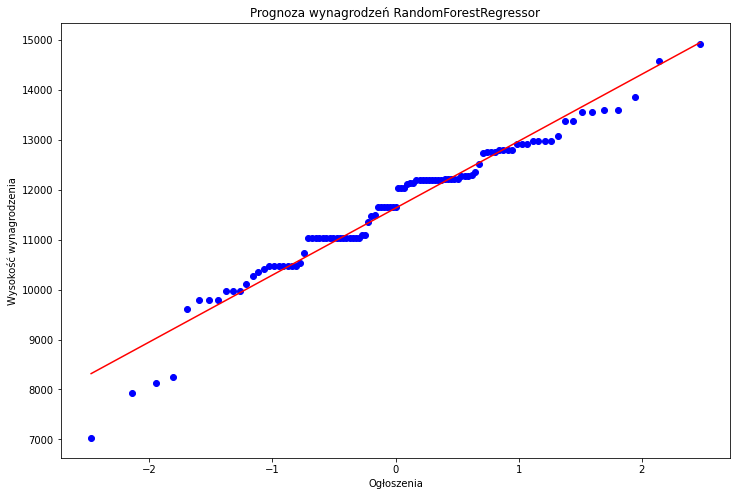

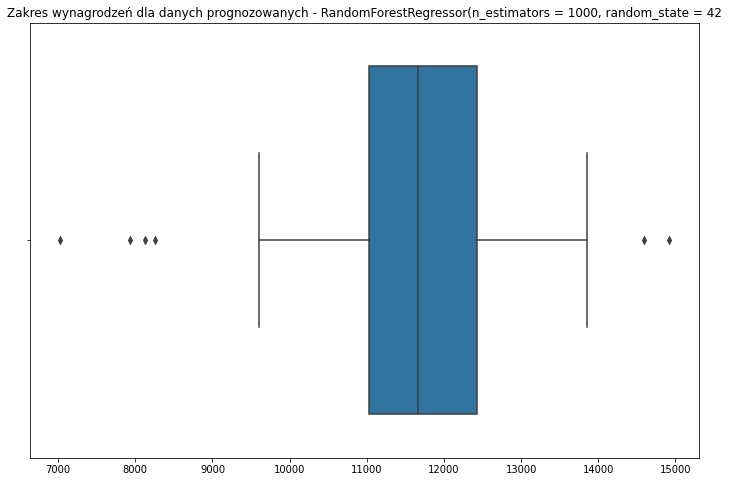

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)

fig = plt.figure()
plt.subplots(figsize = (12, 8))
res = stats.probplot(y_pred, plot=plt)
plt.xlabel("Ogłoszenia")
plt.ylabel("Wysokość wynagrodzenia")
plt.title("Prognoza wynagrodzeń RandomForestRegressor")

plt.subplots(figsize = (12, 8))
sns.boxplot(y_pred).set(title='Zakres wynagrodzeń dla danych prognozowanych - RandomForestRegressor(n_estimators = 1000, random_state = 42')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Zakres wynagrodzeń dla danych prognozowanych - RandomForestRegressor')]

<Figure size 432x288 with 0 Axes>

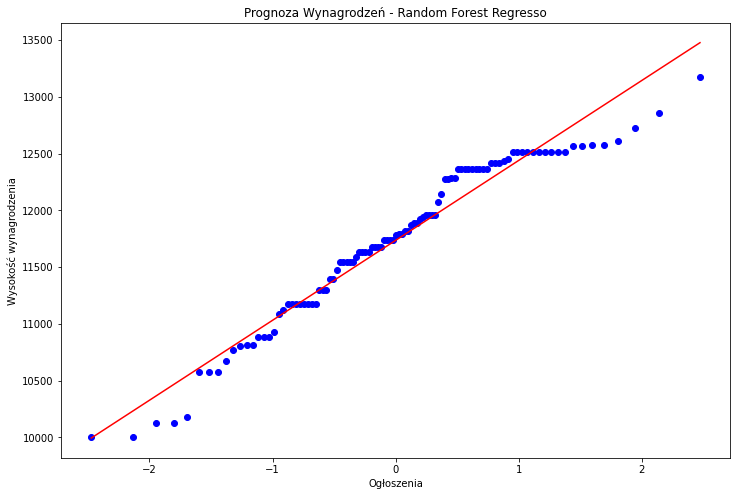

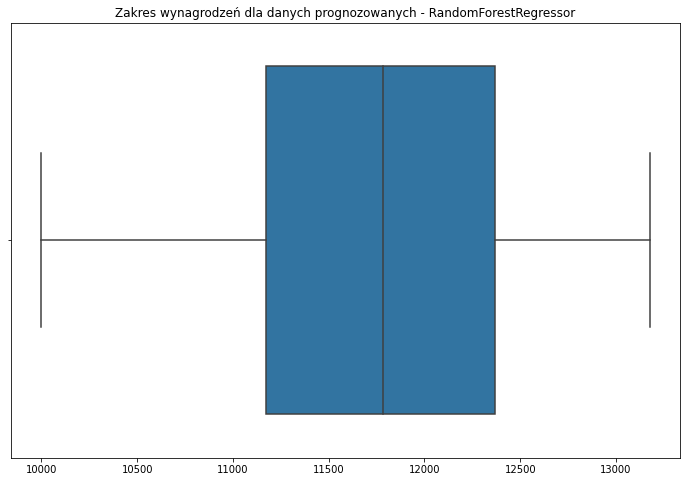

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, min_samples_leaf = 10, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)

fig = plt.figure()
plt.subplots(figsize = (12, 8))
res = stats.probplot(y_pred, plot=plt)
plt.xlabel("Ogłoszenia")
plt.ylabel("Wysokość wynagrodzenia")
plt.title("Prognoza Wynagrodzeń - Random Forest Regresso")

plt.subplots(figsize = (12, 8))
sns.boxplot(y_pred).set(title='Zakres wynagrodzeń dla danych prognozowanych - n_estimators = 500, min_samples_leaf = 10, random_state = 42)')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Model Accuracy: -0.003
The mean squared error (MSE) on test set: 15462812.5427


<Figure size 432x288 with 0 Axes>

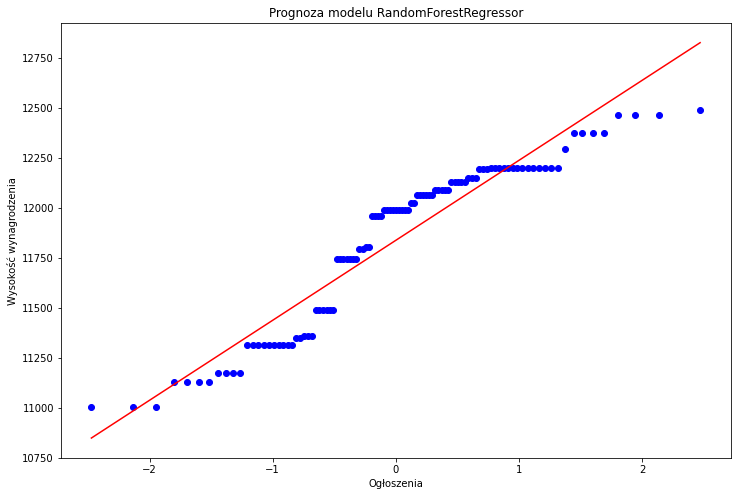

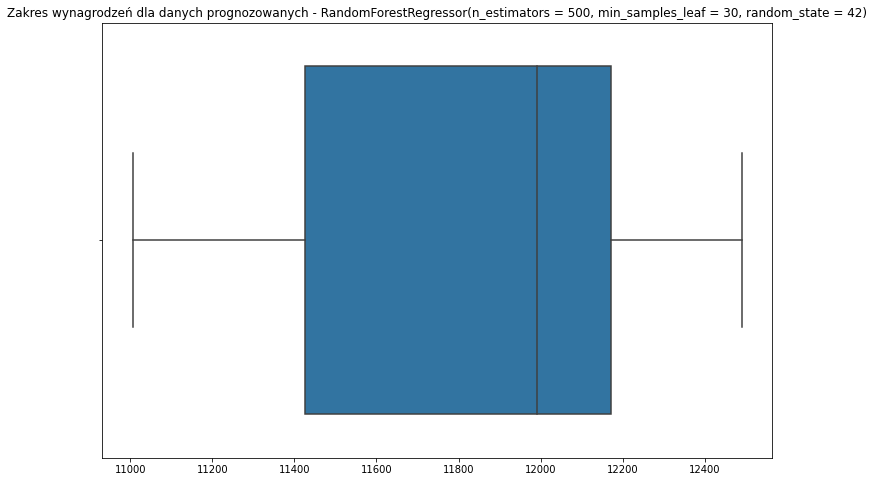

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, min_samples_leaf = 30, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train.ravel())
y_pred = rf.predict(X_test)

fig = plt.figure()
plt.subplots(figsize = (12, 8))
res = stats.probplot(y_pred, plot=plt)
plt.xlabel("Ogłoszenia")
plt.ylabel("Wysokość wynagrodzenia")
plt.title("Prognoza modelu RandomForestRegressor")

plt.subplots(figsize = (12, 8))
sns.boxplot(y_pred).set(title='Zakres wynagrodzeń dla danych prognozowanych - RandomForestRegressor(n_estimators = 500, min_samples_leaf = 30, random_state = 42)')
print("Model Accuracy: %.3f" % rf.score(X_test_std, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, rf.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Model Accuracy: -0.121
The mean squared error (MSE) on test set: 17297212.4554


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Model Accuracy: -0.003


<Figure size 432x288 with 0 Axes>

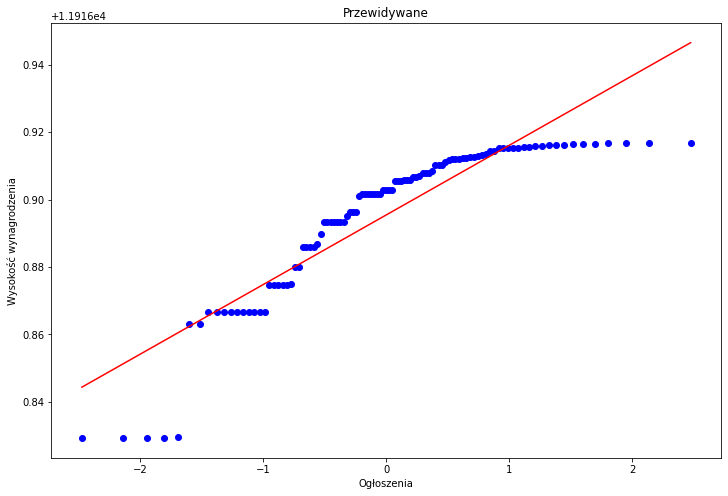

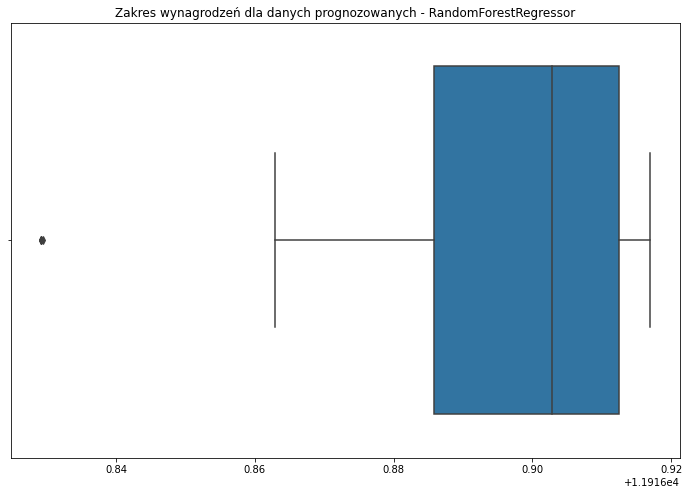

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
#
# Load the Boston Dataset
#
bhp = datasets.load_boston()
#
# Create Training and Test Split

#
# Standardize the dataset
#
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
#
# Hyperparameters for GradientBoostingRegressor
#
gbr_params = {'n_estimators': 500,
          'max_depth': 2,
          'min_samples_split': 3,
          'learning_rate': 0.01,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train_std, y_train)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, gbr.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

fig = plt.figure()
plt.subplots(figsize = (12, 8))
res = stats.probplot(y_pred, plot=plt)
plt.xlabel("Ogłoszenia")
plt.ylabel("Wysokość wynagrodzenia")
plt.title("Przewidywane")

plt.subplots(figsize = (12, 8))
sns.boxplot(y_pred).set(title='Zakres wynagrodzeń dla danych prognozowanych - RandomForestRegressor')
print("Model Accuracy: %.3f" % rf.score(X_test_std, y_test))
#

In [ ]:
# score['cat'] = X_test[:,3],
# score['y_test'] = y_test
# score['y_pred'] = y_pred

# def scatterplot(score):
#   plt.plot(score['cat'], score['y_test'] )
#   plt.plot(score['cat'], score['y_pred'] )
#   plt.show()

# # scatterplot(score)
# print(X_test[:,3])

In [ ]:
data_f.head()

,Max,Min,Level of expireince,experience,cat
0,15083,9250,1,1,3
1,15083,9250,1,4,2
2,15083,9250,1,5,2
3,15083,9250,1,2,2
4,15083,9250,1,3,2


In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X = sc_X.fit_transform(X)
# y = sc_y.fit_transform(y)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
# RandomForestRegressor(...)
# print(regr.predict([[0, 0, 0, 0]]))
